In [21]:
import numpy as np
import h5py
from os.path import join # to use "join" for namespaces

In [22]:
f = h5py.File('data.h5', 'r')

In [23]:
base_keyspace = '/pdp3/result'
E_r_keyspace = 'E_r'
E_z_keyspace = 'E_z'
J_z_keyspace = 'J_z'
J_r_keyspace = 'J_r'
J_phi_keyspace = 'J_phi'
rho_beam_keyspace = 'rho_beam'

In [24]:
for i in f[join(base_keyspace, E_r_keyspace)].keys():
    print(i)

0
1
10
100
101
102
103
104
105
106
107
108
109
11
110
111
112
113
114
115
116
117
118
119
12
120
121
122
123
124
125
126
127
128
129
13
130
131
132
133
134
135
136
137
138
139
14
140
141
142
143
144
145
146
147
148
149
15
150
151
152
153
154
155
156
157
158
159
16
160
161
162
163
164
165
166
167
168
169
17
170
171
172
173
174
175
176
177
178
179
18
180
181
182
183
184
185
186
187
188
189
19
190
191
192
193
194
195
196
197
198
199
2
20
21
22
23
24
25
26
27
28
29
3
30
31
32
33
34
35
36
37
38
39
4
40
41
42
43
44
45
46
47
48
49
5
50
51
52
53
54
55
56
57
58
59
6
60
61
62
63
64
65
66
67
68
69
7
70
71
72
73
74
75
76
77
78
79
8
80
81
82
83
84
85
86
87
88
89
9
90
91
92
93
94
95
96
97
98
99


In [25]:
def get_frame(file, space, number):
    file_path = join(base_keyspace, space, str(number))
    frame = file[file_path][:]
    return frame

In [26]:
get_frame(f, E_r_keyspace, 10)

array([[ 7.65484201e-15, -1.40620649e+04,  6.58347140e+03, ...,
        -3.77790865e+03, -2.71863323e+02,  6.36091265e+02],
       [ 2.17005609e-14, -3.36155404e+03,  3.48660157e+03, ...,
        -5.74989326e+03,  1.76799884e+02,  3.24839261e+03],
       [ 3.10412679e-14, -3.09731232e+03,  3.77127279e+03, ...,
         9.23108982e+03, -2.82810539e+03, -1.24205574e+04],
       ...,
       [-1.45782470e-12, -7.60904722e+03, -8.79470489e+03, ...,
        -9.14344718e+03,  5.87973869e+02,  4.78330385e+03],
       [-1.45993341e-12,  6.96400708e+03,  1.43961234e+04, ...,
         1.06415889e+03,  4.98011442e+03,  1.07172133e+03],
       [-1.51620058e-12,  5.08735560e+02, -4.92295189e+03, ...,
         2.67540743e+03,  3.11285183e+03,  1.19581169e+03]])

In [27]:
def get_row(file, space, number, row_number):
    file_path = join(base_keyspace, space, str(number))
    row = file[file_path][row_number]
    return(row)

In [28]:
def get_col(file, space, number, col_number):
    file_path = join(base_keyspace, space, str(number))
    col = file[file_path][:,col_number]
    return(col)

In [259]:
class H5Reader:
    def __init__(self, h5_path, base_keyspace='/pdp3/result', dump_keyspace='/pdp3/dump'):
        self.file = h5py.File(h5_path)
        self.__base_keyspace = base_keyspace
        self.__dump_keyspace = dump_keyspace
        

    def __get_path__(self, space, ds=''):
        path = join(self.__base_keyspace, space, str(ds))
        return(path)
        
        
    def __check_frame__(self, space, frame):
        if frame < 0:
            raise Exception('frame should not be less, than 0. The value was: {}'.format(frame))
        else:
            path = self.__get_path__(space)
            space_length = len(self.file[path])
            if space_length < frame:
                raise Exception('frame should be less, than {}. The value was: {}'.format(space_length, frame))
            else:
                return(True)


    def __check_row__(self, space, row):
        if row < 0:
            raise Exception('row should not be less than 0. The value was {}'.format(row))
        else:
            path = self.__get_path__(space, 0)
            frame_length = len(self.file[path][0])
            if frame_length < row:
                raise Exception('Out of range: row should be less, than {}. The value was {}.'.format(row, frame_length))
            else:
                return(True)
        
        
    def __check_col__(self, space, col):
        if col < 0:
            raise Exception('column should not be less than 0. The value was {}'.format(col))
        else:
            path = self.__get_path__(space, 0)
            frame_height = len(self.file[path][0,0])
            if frame_length < col:
                raise Exception('Out of range: column should be less, than {}. The value was {}.'.format(col, frame_height))
            else:
                return(True)
        
        
    def __check_frame_range__(self, space, from_frame, to_frame):       
        if to_frame < from_frame:
            raise Exception('from_frame should be less or equal, than to_frame. The values was: {} and {}'.format(from_frame, to_frame))
        elif from_frame < 0:
            raise Exception('from_frame should not be less, than 0. The value was: {}'.format(from_frame))
        else:
            return(self.__check_frame__(space, to_frame))
        
        
    def __check_row_range__(self, space, from_row, to_row):
        if from_row < 0:
            raise Exception('from_row should not be less than 0. The value was {}'.format(from_row))
        elif to_row < from_row:
            raise Exception('from_row should be less than to_row. The values were {} and {}'.format(from_row, to_row))
        else:
            return(self.__check_row__(space, to_row))
        
        
    def __check_col_range__(self, space, from_col, to_col):
        if from_col < 0:
            raise Exception('from_col should not be less than 0. The value was {}'.format(from_col))
        elif to_col < from_col:
            raise Exception('from_col should be less than to_col. The values were {} and {}'.format(from_col, to_col))
        else:
            return(self.__check_col__(space, to_col))

#################################################################################################
#################################################################################################
#################################################################################################
        
    def get_frame(self, space, number):
        if self.__check_frame__(space, number):
            path = self.__get_path__(space, number)
            frame = self.file[path][:]
            return frame
    
    
    def get_row(self, space, number, row_number):
        if self.__check_frame__(space, number) and self.__check_row__(space, row_number):
            path = self.__get_path__(space, number)
            row = self.file[path][row_number]
            return(row)
    
    
    def get_col(self, space, number, col_number):
        if self.__check_frame__(space, number) and self.__check_col__(space, col_number):
            path = self.__get_path__(space, number)
            col = self.file[path][:,col_number]
            return(col)
    
    
    def get_point(self, space, number, row_number, col_number):
        if self.__check_frame__(space, number) and self.__check_row__(space, row_number) and self.__check_col__(space, col_number):
            path = self.__get_path__(space, number)
            point = self.file[path][row_number][col_number]
            return(point)

        
###################################################################

    def get_frame_range(self, space, from_frame=0, to_frame=None):
        path = self.__get_path__(space, 0)
        frame_length = len(self.file[path][:])
        frame_height = len(self.file[path][0])

        if not to_frame:
            path = self.__get_path__(space)
            space_length = len(self.file[path])
            to_frame = space_length-1

        if self.__check_frame_range__(space, from_frame, to_frame):
            frames = np.empty([to_frame - from_frame + 1, frame_length, frame_height])
            
            for i in range(from_frame, to_frame + 1):
                path = self.__get_path__(space, i)
                frames[i-from_frame] = self.file[path][:]
            return(frames)
        
        
    def get_frame_range_row(self, space, from_frame=0, to_frame=None, row_number=0):
        path = self.__get_path__(space, 0)
        frame_length = len(self.file[path][:])
        frame_height = len(self.file[path][0])

        if not to_frame:
            space_length = len(self.file[path])
            to_frame = space_length-1
            
        if self.__check_frame_range__(space, from_frame, to_frame) and self.__check_row__(space, row_number):
            rows = []
            for i in range(from_frame, to_frame+1):
                path = self.__get_path__(space, i)
                rows.append(self.file[path][row_number])
            return(rows)


    def get_frame_range_col(self, space, from_frame=0, to_frame=None, col_number=0):
        if not to_frame:
            path = self.__get_path__(space, 0)
            space_length = len(self.file[path])
            to_frame = space_length-1
            
        if self.__check_frame_range__(space, from_frame, to_frame) and self.__check_col__(space, col_number):
            cols = []
            for i in range(from_frame, to_frame+1):
                path = self.__get_path__(space, i)
                cols.append(self.file[path][:,col_number])
            return(cols)


In [260]:
h5f = H5Reader('./data.h5')

In [264]:
len(h5f.get_frame(E_r_keyspace, 100))

254

In [45]:
y = get_row(f, E_r_keyspace, 10, 4)

In [46]:
x = np.linspace(0, 2045, 2046)

In [47]:
import matplotlib.pyplot as plt

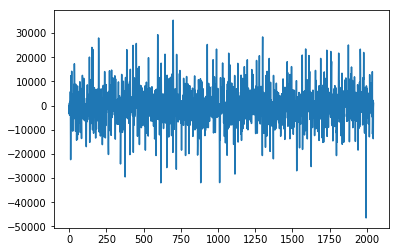

In [48]:
plt.plot(x, y)

In [178]:
a = np.ones([3, 2, 3])

In [179]:
a

array([[[1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.]]])

In [256]:
def __get_path__(base, space, ds=''):
    path = join(base, space, str(ds))
    return(path)

In [258]:
__get_path__('/pdp/result', 'E_z', 0)

'/pdp/result/E_z/0'